<a href="https://colab.research.google.com/github/bernabogazz/winxc/blob/main/WINXCLUB_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#WINXCLUB, MEMBERS: alara turhan, berna boğaz, şevval nilsu tarhan, yunus kerem saçar, begüm polat, mustafa erdoğan 

In [3]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Titanic dataset
train = pd.read_csv("/content/drive/MyDrive/train.csv", header=None)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0


In [8]:
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
246003,248161,-595,NaN,NaN,NaN,N,Bus3,NaN,0,2,...,NaN,-4420,NaN,NaN,0,Mard,0.0,NaN,0,0
246004,257069,-4334,0.1145,0.8368,Panl,N,Mede,0.1180,0,2,...,4.0,-2561,0.9881,0.0000,0,Sind,0.0,0.3333,0,0
246005,154350,365243,0.3025,0.6056,Mixd,N,XNAA,0.2233,0,2,...,1.0,-4636,0.9712,0.0631,0,Cive,0.0,0.1667,0,0
246006,148183,365243,NaN,NaN,NaN,N,XNAA,NaN,0,3,...,5.0,-4636,NaN,NaN,0,Mard,0.0,NaN,0,1
246007,5167,365243,NaN,NaN,NaN,Y,XNAA,NaN,0,2,...,3.0,-4266,NaN,NaN,0,Mard,0.0,NaN,0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 122 entries, 0 to 121
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB


In [10]:
train.describe()

,0,1,2,3,7,8,9,10,11,12,...,111,112,113,114,115,116,118,119,120,121
count,246008.000000,246008.000000,102179.000000,82465.000000,74197.000000,246008.000000,246008.000000,122546.000000,100023.000000,212764.000000,...,77889.000000,212764.000000,246008.000000,126059.000000,110384.000000,246008.000000,245197.000000,123711.000000,246008.000000,246008.000000
mean,153682.293458,63581.163637,0.088517,0.752671,0.042520,0.003382,2.031462,0.107454,0.066357,0.267103,...,0.101908,1.897469,-2994.150438,0.976972,0.027191,0.000004,0.143481,0.226187,0.081392,0.080729
std,88793.060523,141081.696923,0.082581,0.113380,0.074059,0.058057,0.502598,0.110625,0.081432,0.917724,...,0.093524,1.868143,1508.274570,0.065338,0.070493,0.002016,0.447988,0.144506,0.273436,0.272419
min,1.000000,-17912.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76829.750000,-2762.000000,0.044200,0.687200,0.007200,0.000000,2.000000,0.045300,0.018700,0.000000,...,0.051300,0.000000,-4298.000000,0.976700,0.000000,0.000000,0.000000,0.166700,0.000000,0.000000
50%,153532.500000,-1215.000000,0.076400,0.755200,0.019100,0.000000,2.000000,0.074400,0.048200,0.000000,...,0.076100,1.000000,-3255.000000,0.981600,0.001100,0.000000,0.000000,0.166700,0.000000,0.000000
75%,230723.250000,-291.000000,0.112300,0.823200,0.049100,0.000000,2.000000,0.130200,0.085700,0.000000,...,0.123100,3.000000,-1720.000000,0.986600,0.023225,0.000000,0.000000,0.333300,0.000000,0.000000
max,307511.000000,365243.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,27.000000,...,1.000000,25.000000,0.000000,1.000000,1.000000,1.000000,34.000000,1.000000,1.000000,1.000000


In [11]:
train.shape

(246008, 122)

In [12]:
train.dtypes

0        int64
1        int64
2      float64
3      float64
4       object
        ...   
117     object
118    float64
119    float64
120      int64
121      int64
Length: 122, dtype: object

In [13]:
#find the total number of missing values for each column 
train.isnull().sum()

0           0
1           0
2      143829
3      163543
4      124975
        ...  
117         0
118       811
119    122297
120         0
121         0
Length: 122, dtype: int64

# Eksik değerleri kaldırın
train = train.dropna() 
berkanta sor hepsini sildi mi? bu kodla siliyor mu? head() de 0,2,13 diye atlıyor. 

In [15]:

# Eksik değerleri ortalama değerlerle doldurun
train = train.fillna(train.mean())
# Eksik değerleri kaldırın
train = train.dropna()



<ipython-input-15-be461545deef>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


In [16]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,69769,-946,0.161300,0.7960,Panl,N,Bus2,0.07420,0,2,...,1.000000,-4670,0.9851,0.000000,0,Mard,0.0,0.3333,0,0
2,168821,-1646,0.112400,0.8504,Panl,N,Bus3,0.03870,0,2,...,2.000000,-2842,0.9891,0.000000,0,Sind,0.0,0.3750,0,1
13,165874,-7686,0.088517,0.6532,Stok,N,Mede,0.04252,0,2,...,0.000000,-2197,0.9747,0.027191,0,Cive,0.0,0.1250,0,0
15,295340,-5768,0.046500,0.7892,Panl,Y,Bus2,0.03060,0,1,...,1.897469,-688,0.9846,0.000000,0,Sind,0.0,0.5417,0,0
20,206313,-452,0.076200,0.6804,Panl,N,Bus3,0.00730,0,2,...,1.897469,-248,0.9767,0.050600,0,Mard,0.0,0.1667,0,0


In [17]:
train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            112, 113, 114, 115, 116, 117, 118, 119, 120, 121],
           dtype='int64', length=122)

In [18]:
# NaN değerleri içeren sütunların sayısını bulma
null_columns = train.columns[train.isnull().any()]
null_count = train[null_columns].isnull().sum()

print(null_count)

Series([], dtype: float64)


In [19]:
if train.isnull().any().any():
    print("There are still NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [20]:
# NaN değerleri içeren sütunların sayısını bulma
null_columns = train.columns[train.isnull().any()]
null_count = train[null_columns].isnull().sum()

print(null_count)

Series([], dtype: float64)


In [21]:
#remove the not a number values. 
ages = []
for i in train:
  if pd.isna(i):
    continue
  ages.append(i)

In [22]:
from scipy import stats

#hypothesis testing

# generate some random data
np.random.seed(123)
data = np.random.normal(loc=10, scale=2, size=100)

# test the hypothesis that the mean of the data is equal to 9
test_statistic, p_value = stats.ttest_1samp(data, popmean=9)

# print the results
print("Test statistic:", test_statistic)
print("P-value:", p_value)

Test statistic: 4.648538319899446
P-value: 1.0331900407061688e-05


In [23]:
import pandas as pd

# convert your NumPy array to a Pandas DataFrame
data = pd.DataFrame(data)

# rename the columns using the rename method
data = data.rename(columns={'1': 'x', '2': 'y', '3': 'z', '6': 'b'})

In [24]:
data.rename(columns={'1': 'x'}, inplace=True)
data.rename(columns={'2': 'y'}, inplace=True)
data.rename(columns={'3': 'z'}, inplace=True)
data.rename(columns={'6': 'b'}, inplace=True)

In [25]:
print(data.columns)

Int64Index([0], dtype='int64')


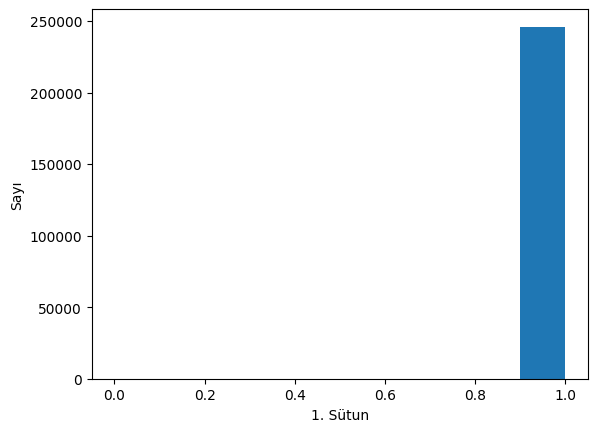

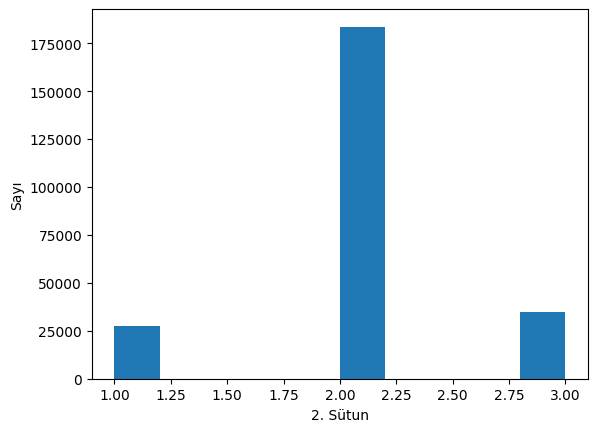

In [28]:

# Veriyi okuyun
data = pd.read_csv('/content/drive/MyDrive/train.csv')

# 1. sütunu histogram olarak çizdirin
plt.hist(data['1'], bins=10)

# Eksen etiketlerini belirle
plt.xlabel('1. Sütun')
plt.ylabel('Sayı')

# Grafiği göster
plt.show()

# 2. sütunu histogram olarak çizdirin
plt.hist(data['2'], bins=10)

# Eksen etiketlerini belirle
plt.xlabel('2. Sütun')
plt.ylabel('Sayı')

# Grafiği göster
plt.show()

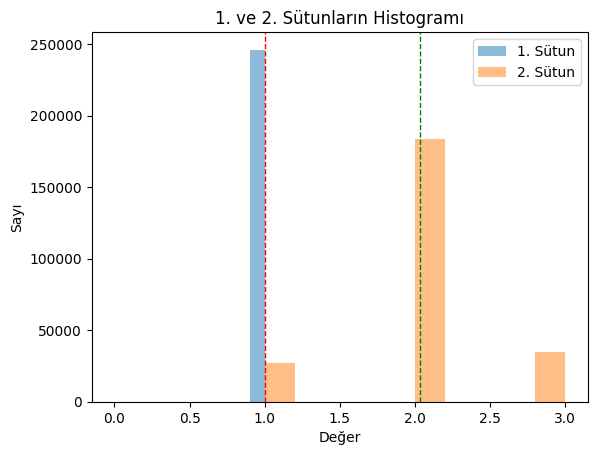

In [ ]:
# 1. ve 2. sütunların histogramlarını aynı grafikte göster
plt.hist(data['1'], bins=10, alpha=0.5, label='1. Sütun')
plt.hist(data['2'], bins=10, alpha=0.5, label='2. Sütun')

# Eksen etiketlerini ve başlığı belirle
plt.xlabel('Değer')
plt.ylabel('Sayı')
plt.title('1. ve 2. Sütunların Histogramı')

# Yatay çizgi ekle (ortalama)
plt.axvline(data['1'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['2'].mean(), color='green', linestyle='dashed', linewidth=1)

# Görselleştirmeyi göster
plt.legend()
plt.show()

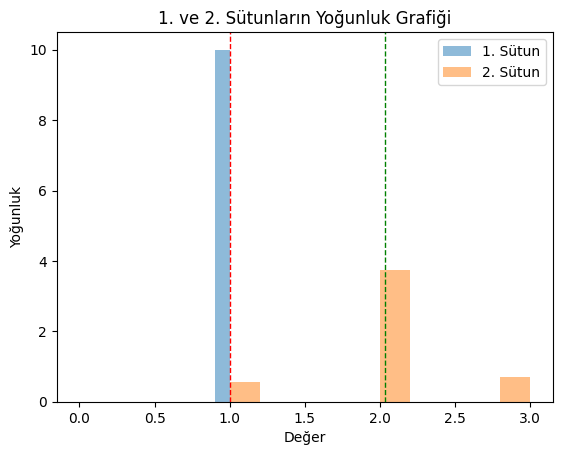

In [ ]:
plt.hist(data['1'], bins=10, density=True, alpha=0.5, label='1. Sütun')
plt.hist(data['2'], bins=10, density=True, alpha=0.5, label='2. Sütun')

# Eksen etiketlerini ve başlığı belirle
plt.xlabel('Değer')
plt.ylabel('Yoğunluk')
plt.title('1. ve 2. Sütunların Yoğunluk Grafiği')

# Yatay çizgi ekle (ortalama)
plt.axvline(data['1'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['2'].mean(), color='green', linestyle='dashed', linewidth=1)

# Görselleştirmeyi göster
plt.legend()

In [ ]:
# İlk 15 satırı al
subset = data.head(15)

# '1' ve '2' sütunları arasındaki korelasyonu hesapla
corr = subset['1'].corr(subset['2'])

print("Korelasyon: ", corr)

Korelasyon:  nan


In [ ]:
# Pearson korelasyon katsayısını hesapla
correlations = data.corr()

# Pozitif korelasyonları seç
positive_correlations = correlations[correlations > 0]

# Korelasyon tablosunu göster
print(positive_correlations)

<ipython-input-146-9401b99d1d27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


                       69769      -946    0.1613  0.7959999999999999  \
69769               1.000000  0.002156       NaN                 NaN   
-946                0.002156  1.000000       NaN                 NaN   
0.1613                   NaN       NaN  1.000000            0.245559   
0.7959999999999999       NaN       NaN  0.245559            1.000000   
0.0742              0.001566       NaN  0.405363            0.223163   
...                      ...       ...       ...                 ...   
0.26                     NaN       NaN  0.010190            0.003628   
0.0.14                   NaN  0.016974       NaN                 NaN   
0.3333.2            0.002237       NaN  0.330778            0.518410   
0.27                     NaN       NaN  0.035887            0.029063   
0.28                     NaN       NaN       NaN                 NaN   

                      0.0742         0         2    0.2281     0.065  \
69769               0.001566  0.000673  0.000782       NaN     

In [ ]:
corr = data.corr().abs()

max_corr = corr.unstack().sort_values(ascending=False).drop_duplicates().head(1)

print("En güçlü korelasyon katsayısı: ", max_corr.values[0])
print("Değişkenler: ", max_corr.index.tolist())

<ipython-input-147-3fdc6084f3bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs()


En güçlü korelasyon katsayısı:  1.0
Değişkenler:  [('69769', '69769')]


<ipython-input-148-aec6ee639abf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


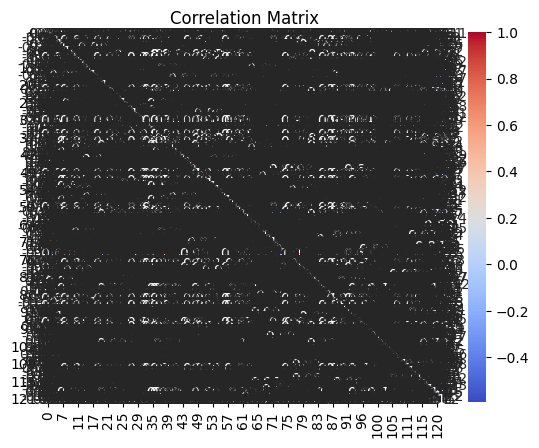

In [ ]:
import seaborn as sns
# Compute the correlation matrix
corr_matrix = train.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()